In [2]:
!pip install dc_stat_think

# ***EDA: Plot ECDFs of active bout length***

An active bout is a stretch of time where a fish is constantly moving. Plot an ECDF of active bout length for the mutant and wild type fish for the seventh night of their lives. The datasets are in the numpy arrays `bout_lengths_wt` and `bout_lengths_mut`. The bout lengths are in units of minutes.

* Import the module `dc_stat_think` as `dcst` so you have its functions available.

* Generate the x and y values for plotting the ECDF of the wild type fish (`bout_lengths_wt`) using `dcst.ecdf()`. Store the result in numpy arrays named `x_wt` and `y_wt`.

* Do the same for the the mutant fish (`bout_lengths_mut`), storing the result in numpy arrays named `x_mut` and `y_mut`.

* Use `plt.plot()` to plot the two ECDFs as dots on the same plot. Be sure to specify the keyword arguments `marker='.'` and `linestyle='none'`.


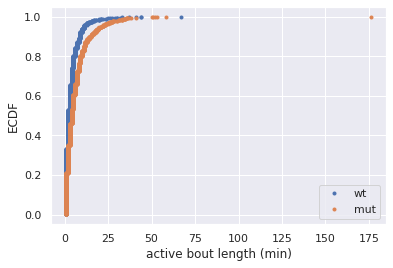

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst

sns.set()

df = pd.read_csv('gandhi_et_al_bouts.csv')
bout_lengths_het = df.groupby('genotype').get_group('het')['bout_length'].values
bout_lengths_wt = df.groupby('genotype').get_group('wt')['bout_length'].values
bout_lengths_mut = df.groupby('genotype').get_group('mut')['bout_length'].values

# Generate x and y values for plotting ECDFs
x_wt, y_wt = dcst.ecdf(bout_lengths_wt)
x_mut, y_mut = dcst.ecdf(bout_lengths_mut)

# Plot the ECDFs
plt.plot(x_wt, y_wt, marker='.', linestyle='none')
plt.plot(x_mut, y_mut, marker='.', linestyle='none')

# Make a legend, label axes, and show plot
plt.legend(('wt', 'mut'))
plt.xlabel('active bout length (min)')
plt.ylabel('ECDF')
plt.show()

There is an outlier of one active bout for a mutant fish, and the ECDF exposes this clearly. It is important to know about, but we will not focus on it going forward, though.  While not exactly Exponentially distributed, the ECDF has no left tail, and no discernible inflection point, which is very much like the Exponential CDF.

# ***Parameter estimation: active bout length***

Compute the mean active bout length for wild type and mutant, with 95% bootstrap confidence interval. The datasets are again available in the numpy arrays `bout_lengths_wt` and `bout_lengths_mut`. The `dc_stat_think` module has been imported as `dcst`.

* Compute the mean active bout length for wild type and mutant using `np.mean()`. Store the results as `mean_wt` and `mean_mut`.

* Draw 10,000 bootstrap replicates for each using `dcst.draw_bs_reps()`, storing the results as `bs_reps_wt` and `bs_reps_mut`.

* Compute a 95% confidence interval from the bootstrap replicates using `np.percentile()`, storing the results as `conf_int_wt` and `conf_int_mut`.




In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst

sns.set()

df = pd.read_csv('gandhi_et_al_bouts.csv')
bout_lengths_het = df.groupby('genotype').get_group('het')['bout_length'].values
bout_lengths_wt = df.groupby('genotype').get_group('wt')['bout_length'].values
bout_lengths_mut = df.groupby('genotype').get_group('mut')['bout_length'].values

# Compute mean active bout length
mean_wt = np.mean(bout_lengths_wt)
mean_mut = np.mean(bout_lengths_mut)

# Draw bootstrap replicates
bs_reps_wt = dcst.draw_bs_reps(bout_lengths_wt, np.mean, size=10000)
bs_reps_mut = dcst.draw_bs_reps(bout_lengths_mut, np.mean, size=10000)

# Compute 95% confidence intervals
conf_int_wt = np.percentile(bs_reps_wt, [2.5, 97.5])
conf_int_mut = np.percentile(bs_reps_mut, [2.5, 97.5])

# Print the results
print("""
wt:  mean = {0:.3f} min., conf. int. = [{1:.1f}, {2:.1f}] min.
mut: mean = {3:.3f} min., conf. int. = [{4:.1f}, {5:.1f}] min.
""".format(mean_wt, *conf_int_wt, mean_mut, *conf_int_mut))


wt:  mean = 3.874 min., conf. int. = [3.6, 4.1] min.
mut: mean = 6.543 min., conf. int. = [6.1, 7.0] min.



# ***Permutation test: wild type versus heterozygote***

Test the hypothesis that the heterozygote and wild type bout lengths are identically distributed using a permutation test.

* Compute the difference of means (heterozygote minus wild type bout lengths) of the actual datasets, storing the result in the variable `diff_means_exp`. The numpy arrays `bout_lengths_wt` and `bout_lengths_het` are already in your namespace.

* Draw 10,000 permutation replicates of the difference of means using `dcst.draw_perm_reps()`. You can use the `dcst.diff_of_means()` function as well, storing your result in `perm_reps`.

* Compute the p-value, defining "at least as extreme as" to be that the difference of means under the null hypothesis is greater than or equal to that which was observed experimentally.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst

sns.set()

df = pd.read_csv('gandhi_et_al_bouts.csv')
bout_lengths_het = df.groupby('genotype').get_group('het')['bout_length'].values
bout_lengths_wt = df.groupby('genotype').get_group('wt')['bout_length'].values
bout_lengths_mut = df.groupby('genotype').get_group('mut')['bout_length'].values

# Compute the difference of means: diff_means_exp
diff_means_exp = np.mean(bout_lengths_het) - np.mean(bout_lengths_wt)

# Draw permutation replicates: perm_reps
perm_reps = dcst.draw_perm_reps(bout_lengths_het, bout_lengths_wt, 
                               dcst.diff_of_means, size=10000)

# Compute the p-value: p-val
p_val = np.sum(perm_reps >= diff_means_exp) / len(perm_reps)

# Print the result
print('p =', p_val)

p = 0.0006


A p-value of 0.0006 suggests that the observed difference in means is unlikely to occur if heterozygotic and wild type fish have active bout lengths that are identically distributed.

# ***Bootstrap hypothesis test***

The permutation test has a pretty restrictive hypothesis, that the heterozygotic and wild type bout lengths are identically distributed. Now, use a bootstrap hypothesis test to test the hypothesis that the means are equal, making no assumptions about the distributions.

* Make an array, `bout_lengths_concat`, that contains all of the bout lengths for both wild type (`bout_lengths_wt`) and heterozygote (`bout_lengths_het`) using `np.concatenate()`.

* Compute the mean of all bout lengths from this concatenated array (`bout_lengths_concat`), storing the results in the variable `mean_bout_length`.

* Shift both datasets such that they both have the same mean, namely `mean_bout_length`. Store the shifted arrays in variables `wt_shifted` and `het_shifted`.

* Use `dcst.draw_bs_reps()` to draw 10,000 bootstrap replicates of the mean for each of the shifted datasets. Store the respective replicates in `bs_reps_wt` and `bs_reps_het`.

* Subtract `bs_reps_wt` from `bs_reps_het` to get the bootstrap replicates of the difference of means. Store the results in the variable `bs_reps`.

* Compute the p-value, defining "at least as extreme as" to be that the difference of means under the null hypothesis is greater than or equal to that which was observed experimentally. The variable `diff_means_exp` from the last exercise is already in your namespace.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst

sns.set()

df = pd.read_csv('gandhi_et_al_bouts.csv')
bout_lengths_het = df.groupby('genotype').get_group('het')['bout_length'].values
bout_lengths_wt = df.groupby('genotype').get_group('wt')['bout_length'].values
bout_lengths_mut = df.groupby('genotype').get_group('mut')['bout_length'].values

# Compute the difference of means: diff_means_exp
diff_means_exp = np.mean(bout_lengths_het) - np.mean(bout_lengths_wt)

# Concatenate arrays: bout_lengths_concat
bout_lengths_concat = np.concatenate((bout_lengths_wt, bout_lengths_het))

# Compute mean of all bout_lengths: mean_bout_length
mean_bout_length = np.mean(bout_lengths_concat)

# Generate shifted arrays
wt_shifted = bout_lengths_wt - np.mean(bout_lengths_wt) + mean_bout_length
het_shifted = bout_lengths_het - np.mean(bout_lengths_het) + mean_bout_length

# Compute 10,000 bootstrap replicates from shifted arrays
bs_reps_wt = dcst.draw_bs_reps(wt_shifted, np.mean, size=10000)
bs_reps_het = dcst.draw_bs_reps(het_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_reps = bs_reps_het - bs_reps_wt

# Compute and print p-value: p
p = np.sum(bs_reps >= diff_means_exp) / len(bs_reps)
print('p-value =', p)

p-value = 0.0007


We get a result of similar magnitude as the permutation test.

# ***Linear regressions and pairs bootstrap***



```
slope, intercept = np.polyfit(t, bac_area, 1)
```



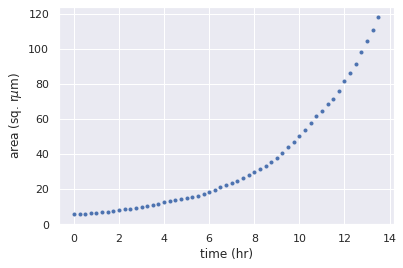

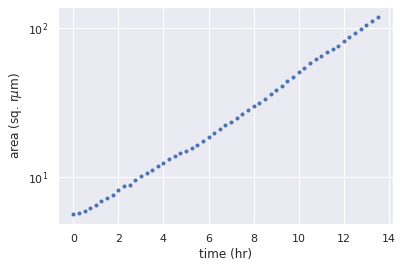

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst

sns.set()

df = pd.read_csv('park_bacterial_growth.csv')
plt.plot(df['time (hr)'], df['bacterial area (sq. microns)'], marker='.', linestyle='None')
plt.xlabel('time (hr)')
plt.ylabel('area (sq. r$\mu$m)')
plt.show()

plt.semilogy(df['time (hr)'], df['bacterial area (sq. microns)'], marker='.', linestyle='None')
plt.xlabel('time (hr)')
plt.ylabel('area (sq. r$\mu$m)')
plt.show()

## ***Estimated Line***

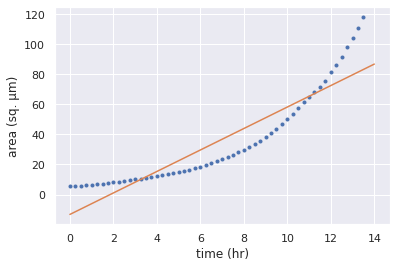

In [18]:
slope, intercept = np.polyfit(df['time (hr)'].values, df['bacterial area (sq. microns)'].values, 1)
t_theor = np.array([0, 14])
bac_area_theor = slope * t_theor + intercept

plt.plot(df['time (hr)'], df['bacterial area (sq. microns)'], marker='.', linestyle='None')
plt.plot(t_theor, bac_area_theor)
plt.xlabel('time (hr)')
plt.ylabel('area (sq. μm)')
plt.show()

# ***Semilog-linear regression with `np.polyfit()`***

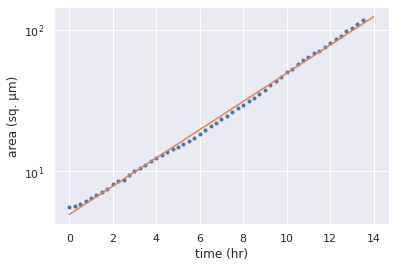

In [22]:
slope, intercept = np.polyfit(df['time (hr)'].values, np.log(df['bacterial area (sq. microns)'].values), 1)
t_theor = np.array([0, 14])
bac_area_theor = np.exp(slope * t_theor + intercept)

plt.semilogy(df['time (hr)'], df['bacterial area (sq. microns)'], marker='.', linestyle='none')
plt.semilogy(t_theor, bac_area_theor)
plt.xlabel('time (hr)')
plt.ylabel('area (sq. μm)')
plt.show()

## ***Pairs bootstrap***


In [ ]:
# Draw 10000 pairs bootstrap reps
slope_reps, int_reps = dcst.draw_bs_pairs_linreg(x_data, y_data, size=10000)
# Compute 95% confidence interval of slope
slope_conf_int = np.percentile(slope_reps, [2.5, 97.5])

### ***Assessing the growth rate***

To compute the growth rate, you can do a linear regression of the logarithm of the total bacterial area versus time. Compute the growth rate and get a 95% confidence interval using pairs bootstrap. The time points, in units of hours, are stored in the numpy array `t` and the bacterial area, in units of square micrometers, is stored in `bac_area`.

* Compute the logarithm of the bacterial area (`bac_area`) using `np.log()` and store the result in the variable `log_bac_area`.

* Compute the slope and intercept of the semilog growth curve using `np.polyfit()`. Store the slope in the variable `growth_rate` and the intercept in `log_a0`.

* Draw 10,000 pairs bootstrap replicates of the growth rate and log initial area using `dcst.draw_bs_pairs_linreg()`. Store the results in `growth_rate_bs_reps` and `log_a0_bs_reps`.

* Use `np.percentile()` to compute the 95% confidence interval of the growth rate (`growth_rate_bs_reps`).

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst

sns.set()

df = pd.read_csv('park_bacterial_growth.csv')
t, bac_area = df['time (hr)'].values, df['bacterial area (sq. microns)'].values

# Compute logarithm of the bacterial area: log_bac_area
log_bac_area = np.log(bac_area)

# Compute the slope and intercept: growth_rate, log_a0
growth_rate, log_a0 = np.polyfit(t, log_bac_area, 1)

# Draw 10,000 pairs bootstrap replicates: growth_rate_bs_reps, log_a0_bs_reps
growth_rate_bs_reps, log_a0_bs_reps = dcst.draw_bs_pairs_linreg(t, log_bac_area, size=10000)
    
# Compute confidence intervals: growth_rate_conf_int
growth_rate_conf_int = np.percentile(growth_rate_bs_reps, [2.5, 97.5])

# Print the result to the screen
print("""Growth rate: {0:.4f} 1/hour 95% conf int: [{1:.4f}, {2:.4f}] 1/hour""".format(growth_rate, *growth_rate_conf_int))

Growth rate: 0.2301 1/hour 95% conf int: [0.2266, 0.2337] 1/hour


Under these conditions, the bacterial mass doubles about every three hours. The error bar is very tight, which we will see graphically in the next exercise.

### ***Plotting the growth curve***

You saw in the previous exercise that the confidence interval on the growth curve is very tight. You will explore this graphically here by plotting several bootstrap lines along with the growth curve. You will use the `plt.semilogy()` function to make the plot with the y-axis on a log scale. This means that you will need to transform your theoretical linear regression curve for plotting by exponentiating it.

* Plot the data points using `plt.semilogy()`. The numpy arrays `t` and `bac_area` are again in your namespace.

* Use `np.array()` to generate time values for plotting the bootstrap lines. Call this `t_bs`. The time should go from `0` to `14` hours.

* Write a `for` loop to plot regression lines corresponding to the first 100 pairs bootstrap replicates. The numpy arrays `growth_rate_bs_reps` and `log_a0_bs_reps` that you computed in the last exercise are in your namespace.

* Compute the growth curve by exponentiating the linear regression line using `np.exp()`.

* Plot the theoretical line using `plt.semilogy()` with keyword arguments `linewidth=0.5`, `alpha=0.05`, and `color='red'`.

* Label the axes and show your plot. Appropriate labels for the respective x and y axes are `'time (hr)'` and `'area (sq. µm)'`.

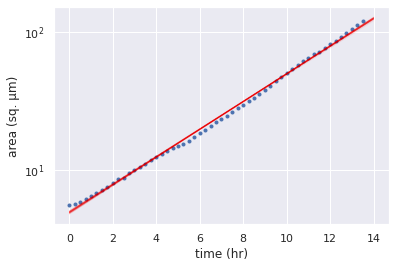

In [23]:
# Plot data points in a semilog-y plot with axis labeles
plt.semilogy(t, bac_area, marker='.', linestyle='none')

# Generate x-values for the bootstrap lines: t_bs
t_bs = np.array([0, 14])

# Plot the first 100 bootstrap lines
for i in range(100):
    y = np.exp(growth_rate_bs_reps[i] * t_bs + log_a0_bs_reps[i])
    plt.semilogy(t_bs, y, linewidth=0.5, alpha=0.05, color='red')
    
# Label axes and show plot
plt.xlabel('time (hr)')
plt.ylabel('area (sq. µm)')
plt.show()

You can see that the bootstrap replicates do not stray much. This is due to the exquisitly exponential nature of the bacterial growth under these experimental conditions.

# ***Graphical EDA of men's 200 free heats***

In the heats, all contestants swim, the very fast and the very slow. To explore how the swim times are distributed, plot an ECDF of the men's 200 freestyle.

* Generate x and y values for the ECDF using `dcst.ecdf()`. The swim times of the heats are stored in the numpy array `mens_200_free_heats`.

* Plot the ECDF as dots. Remember to specify the appropriate marker and linestyle.

* Label the axes and show the plot. Use `'time (s)'` as the x-axis label and `'ECDF'` as the y-axis label.

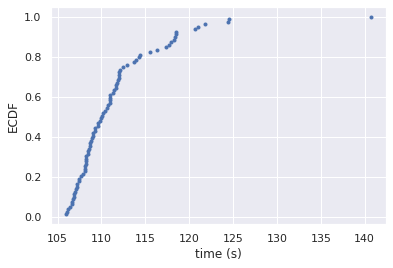

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst

sns.set()

mens_200_free_heats = np.array([118.32, 107.73, 107.  , 106.39, 108.75, 117.74, 108.43, 111.96,
       114.36, 121.77, 108.23, 107.47, 118.41, 108.29, 106.  , 109.32,
       111.49, 112.92, 117.38, 110.95, 108.27, 111.78, 107.87, 110.77,
       109.05, 111.  , 108.77, 106.1 , 106.61, 113.68, 108.2 , 106.2 ,
       111.01, 109.25, 112.  , 118.55, 109.56, 108.18, 111.67, 108.09,
       110.04, 113.97, 109.91, 112.12, 111.65, 110.18, 116.36, 124.59,
       115.59, 121.01, 106.88, 108.96, 109.09, 108.67, 109.6 , 111.85,
       118.54, 108.12, 124.38, 107.17, 107.48, 106.65, 106.91, 140.68,
       117.93, 120.66, 111.29, 107.1 , 108.49, 112.43, 110.61, 110.38,
       109.87, 106.73, 107.18, 110.98, 108.55, 114.31, 112.05])

# Generate x and y values for ECDF: x, y
x, y = dcst.ecdf(mens_200_free_heats)

# Plot the ECDF as dots
plt.plot(x, y, marker='.', linestyle='None')

# Label axes and show plot
plt.xlabel('time (s)')
plt.ylabel('ECDF')
plt.show()

Graphical EDA is always a great start. We see that fast swimmers are below 115 seconds, with a smattering of slow swimmers past that, including one very slow swimmer.

### ***200 m free time with confidence interval***

Now, you will practice parameter estimation and computation of confidence intervals by computing the mean and median swim time for the men's 200 freestyle heats. The median is useful because it is immune to heavy tails in the distribution of swim times, such as the slow swimmers in the heats. `mens_200_free_heats` is still in your namespace.

* Compute the mean and median swim times, storing them in variables `mean_time` and `median_time`. The swim times are contained in `mens_200_free_heats`.

* Draw 10,000 bootstrap replicates each of the mean and median swim time using `dcst.draw_bs_reps()`. Store the results in `bs_reps_mean` and `bs_reps_median`.

* Compute the 95% confidence intervals for the mean and median using the bootstrap replicates and `np.percentile()`.

In [29]:
# Compute mean and median swim times
mean_time = np.mean(mens_200_free_heats)
median_time = np.median(mens_200_free_heats)

# Draw 10,000 bootstrap replicates of the mean and median
bs_reps_mean = dcst.draw_bs_reps(mens_200_free_heats, np.mean, 10000)
bs_reps_median = dcst.draw_bs_reps(mens_200_free_heats, np.median, 10000)

# Compute the 95% confidence intervals
conf_int_mean = np.percentile(bs_reps_mean, [2.5, 97.5])
conf_int_median = np.percentile(bs_reps_median, [2.5, 97.5])

# Print the result to the screen
print("""
mean time: {0:.2f} sec.
95% conf int of mean: [{1:.2f}, {2:.2f}] sec.

median time: {3:.2f} sec.
95% conf int of median: [{4:.2f}, {5:.2f}] sec.
""".format(mean_time, *conf_int_mean, median_time, *conf_int_median))


mean time: 111.63 sec.
95% conf int of mean: [110.51, 112.92] sec.

median time: 110.04 sec.
95% conf int of median: [108.96, 111.01] sec.



Indeed, the mean swim time is longer than the median because of the effect of the very slow swimmers.

# ***EDA: finals versus semifinals***

First, you will get an understanding of how athletes' performance changes from the semifinals to the finals by computing the fractional improvement from the semifinals to finals and plotting an ECDF of all of these values.

The arrays `final_times` and `semi_times` contain the swim times of the respective rounds. The arrays are aligned such that `final_times[i]` and `semi_times[i]` are for the same swimmer/event. If you are interested in the strokes/events, you can check out the data frame `df` in your namespace, which has more detailed information, but is not used in the analysis.

* Compute the fractional improvement from the semifinals to finals. Store the results as `f`.

* Compute the x and y values for plotting the ECDF.

* Plot the ECDF as dots.


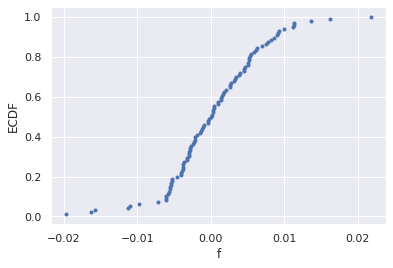

In [33]:
final_times = np.array([ 52.52,  24.12,  52.82,  24.36,  57.67, 116.41,  58.26,  27.66,
       125.81,  58.75,  27.92, 126.78,  25.93,  24.44,  27.26,  58.22,
       128.66,  24.39,  57.69, 143.61, 128.51,  30.74,  59.02,  27.11,
        57.85,  66.55, 142.76,  57.48,  25.37, 116.27,  54.76, 126.51,
        27.58, 130.2 , 142.76,  57.05,  25.34,  58.86,  27.73,  25.78,
       142.76,  25.85,  24.51,  59.78,  27.99,  57.94, 126.78, 128.49,
        28.17, 116.19, 126.84, 127.76, 129.53,  67.1 ,  31.12, 115.32,
        67.6 ,  66.42,  30.11, 125.56,  66.43, 141.15, 143.19,  66.36,
        30.14, 116.79,  53.58,  53.17,  24.22,  25.64,  26.2 , 116.16,
       127.64,  65.66,  30.13,  59.66, 143.59,  55.64,  52.7 ,  24.96,
        24.31,  67.17,  30.05,  31.14,  53.93,  24.57, 142.44, 115.16,
        59.4 , 115.49,  54.  , 126.34,  30.2 , 126.95,  59.99, 126.4 ])

semi_times = np.array([ 53.  ,  24.32,  52.84,  24.22,  57.59, 116.95,  58.56,  27.7 ,
       126.56,  59.05,  27.83, 127.57,  25.81,  24.38,  27.41,  58.05,
       128.99,  24.52,  57.52, 142.82, 128.16,  31.03,  59.33,  27.18,
        57.63,  66.28, 143.06,  57.36,  25.79, 116.44,  53.91, 127.08,
        27.67, 127.69, 141.99,  57.04,  25.27,  58.84,  27.63,  25.88,
       142.9 ,  25.71,  24.5 ,  59.71,  27.88,  57.77, 126.64, 129.16,
        28.01, 116.51, 126.18, 127.05, 129.04,  67.11,  30.9 , 116.23,
        66.95,  66.21,  30.78, 126.36,  66.64, 142.15, 142.88,  65.64,
        29.98, 116.91,  53.38,  53.78,  24.23,  25.9 ,  25.91, 116.56,
       128.74,  65.6 ,  30.14,  59.55, 142.72,  55.74,  52.78,  25.06,
        24.31,  66.76,  30.39,  30.64,  53.81,  24.47, 142.04, 116.76,
        59.42, 116.37,  53.92, 127.79,  30.25, 127.52,  59.63, 127.57])

# Compute fractional difference in time between finals and semis
f = (semi_times - final_times) / semi_times

# Generate x and y values for the ECDF: x, y
x, y = dcst.ecdf(f)

# Make a plot of the ECDF
plt.plot(x, y, marker='.', linestyle='none')

# Label axes and show plot
plt.xlabel('f')
plt.ylabel('ECDF')
plt.show()

The median of the ECDF is juuuust above zero. But at first glance, it does not look like there is much of any difference between semifinals and finals. We'll check this carefully in the next exercises.

# ***Parameter estimates of difference between finals and semifinals***

Compute the mean fractional improvement from the semifinals to finals, along with a 95% confidence interval of the mean. The NumPy array `f` that you computed in the last exercise is in your namespace.

* Compute the mean of `f`, storing the result in `f_mean`.

* Generate 10,000 bootstrap replicates of the mean of `f`. Store the results in `bs_reps`.

* Compute a 95% confidence interval from these bootstrap replicates.


In [34]:
# Mean fractional time difference: f_mean
f_mean = np.mean(f)

# Get bootstrap reps of mean: bs_reps
bs_reps = dcst.draw_bs_reps(f, np.mean, 10000)

# Compute confidence intervals: conf_int
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Report
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]""".format(f_mean, *conf_int))


mean frac. diff.: 0.00040
95% conf int of mean frac. diff.: [-0.00092, 0.00175]


It looks like the mean finals time is juuuust faster than the mean semifinal time, and they very well may be the same. We'll test this hypothesis next.

# ***How to do the permutation test***

Based on our EDA and parameter estimates, it is tough to discern improvement from the semifinals to finals. In the next exercise, you will test the hypothesis that there is no difference in performance between the semifinals and finals. A permutation test is fitting for this. We will use the mean value of `f` as the test statistic. 

* Take an array of semifinal times and an array of final times for each swimmer for each stroke/distance pair.

* Go through each array, and for each index, swap the entry in the respective final and semifinal array with a 50% probability.

* Use the resulting final and semifinal arrays to compute `f` and then the mean of `f`.

### ***Generating permutation samples***

As you worked out in the last exercise, we need to generate a permutation sample by randomly swapping corresponding entries in the `semi_times` and `final_times` array. Write a function with signature `swap_random(a, b)` that returns arrays where random indices have the entries in `a` and `b` swapped.

* Define a function with signature `swap_random(a, b)` that does the following.

  * Create an array `swap_inds` the same length as the input arrays where each entry is `True` with 50/50 probability. Hint: Use `np.random.random()` with the `size=len(a)` keyword argument. Each entry in the result that is less than 0.5 should be `True`.
  * Make copies of `a` and `b`, called `a_out` and `b_out`, respectively using `np.copy()`.

  * Use Boolean indexing with the `swap_inds` array to swap the appropriate entries of `b` into `a_out` and of `a` into `b_out`.

  * Return `a_out` and `b_out`.
  

In [35]:
def swap_random(a, b):
    """Randomly swap entries in two arrays."""
    # Indices to swap
    swap_inds = np.random.random(size=len(a)) < 0.5
    
    # Make copies of arrays a and b for output
    a_out = np.copy(a)
    b_out = np.copy(b)
    
    # Swap values
    a_out[swap_inds] = b[swap_inds]
    b_out[swap_inds] = a[swap_inds]

    return a_out, b_out

### ***Hypothesis test: Do women swim the same way in semis and finals?***

Test the hypothesis that performance in the finals and semifinals are identical using the mean of the fractional improvement as your test statistic. The test statistic under the null hypothesis is considered to be at least as extreme as what was observed if it is greater than or equal to `f_mean`, which is already in your namespace.

The semifinal and final times are contained in the numpy arrays `semi_times` and `final_times`.

* Set up an empty array to contain `1000` permutation replicates using `np.empty()`. Call this array `perm_reps`.

* Write a `for` loop to generate permutation replicates.

  * Generate a permutation sample using the `swap_random()` function you just wrote. 
  * Store the arrays in `semi_perm` and `final_perm`.
  * Compute the value of `f` from the permutation sample.
  * Store the mean of the permutation sample in the `perm_reps` array.

* Compute the p-value

In [37]:
# Set up array of permutation replicates
perm_reps = np.empty(1000)

for i in range(1000):
    # Generate a permutation sample
    semi_perm, final_perm = swap_random(semi_times, final_times)
    
    # Compute f from the permutation sample
    f = (semi_perm - final_perm) / semi_perm
    
    # Compute and store permutation replicate
    perm_reps[i] = np.mean(f)

# Compute and print p-value
print('p =', np.sum(perm_reps >= f_mean) / 1000)

p = 0.262


The p-value is large, about 0.27, which suggests that the results of the 2015 World Championships are consistent with there being no difference in performance between the finals and semifinals.

### ***EDA: Plot all your data***

To get a graphical overview of a dataset, it is often useful to plot all of your data. In this exercise, plot all of the splits for all female swimmers in the 800 meter heats. The data are available in a NumPy arrays `split_number` and `splits`. The arrays are organized such that `splits[i,j]` is the split time for swimmer i for `split_number[j]`.

* Write a `for` loop, looping over the set of `splits` for each swimmer to:

  * Plot the split time versus split number. Use the `linewidth=1` and `color='lightgray'` keyword arguments.

* Compute the mean split times for each distance. You can do this using the `np.mean()` function with the `axis=0` keyword argument. This tells `np.mean()` to compute the means over rows, which will give the mean split time for each split number.

* Plot the mean split times (y-axis) versus split number (x-axis) using the `marker='.'`, `linewidth=3`, and `markersize=12` keyword arguments.

* Label the axes and show the plot.


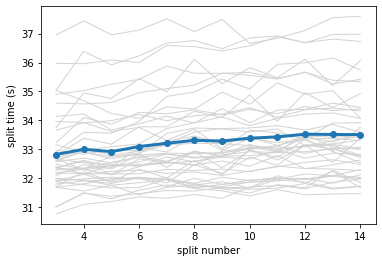

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

split_number = np.array([3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
splits = np.array([[35.04, 36.39, 35.92, 36.23, 36.67, 36.76, 36.48, 36.85, 36.92,
        36.68, 36.97, 36.98],
       [34.14, 34.22, 33.67, 33.88, 34.15, 33.91, 34.41, 33.92, 34.36,
        34.38, 34.6 , 34.45],
       [31.8 , 31.91, 31.95, 32.04, 31.95, 31.65, 31.57, 31.39, 31.61,
        31.43, 31.46, 31.47],
       [33.16, 32.9 , 32.68, 32.84, 33.55, 33.74, 33.71, 33.6 , 33.71,
        33.12, 33.14, 32.79],
       [32.97, 32.83, 32.99, 32.94, 33.19, 33.6 , 33.72, 33.74, 33.82,
        33.67, 33.86, 33.59],
       [34.6 , 34.57, 34.62, 34.96, 35.1 , 35.22, 35.63, 35.56, 35.43,
        35.67, 35.26, 35.42],
       [32.18, 32.17, 32.15, 32.16, 32.31, 32.27, 32.32, 32.23, 32.42,
        32.34, 32.32, 32.27],
       [32.4 , 32.14, 32.46, 32.43, 32.58, 32.46, 32.6 , 32.42, 32.79,
        32.33, 32.47, 32.63],
       [32.67, 32.54, 32.48, 32.42, 32.55, 32.45, 32.94, 33.03, 33.12,
        33.47, 33.42, 33.48],
       [33.76, 34.95, 34.76, 35.45, 34.99, 36.11, 35.27, 35.82, 35.48,
        36.12, 35.2 , 36.07],
       [32.57, 32.7 , 32.53, 32.73, 32.84, 32.7 , 32.75, 33.07, 33.01,
        33.11, 33.17, 33.02],
       [35.04, 34.69, 34.24, 34.07, 34.47, 34.39, 34.98, 34.56, 35.3 ,
        34.9 , 35.03, 34.08],
       [32.61, 32.97, 33.09, 33.19, 33.72, 33.92, 34.12, 33.82, 34.07,
        34.22, 34.26, 34.07],
       [31.01, 31.49, 31.38, 31.47, 31.58, 31.56, 31.68, 31.68, 32.09,
        31.83, 32.25, 31.67],
       [32.29, 32.36, 32.43, 32.56, 32.84, 32.73, 32.77, 32.78, 32.91,
        33.15, 33.19, 33.32],
       [31.92, 32.14, 31.87, 32.02, 31.84, 32.47, 32.17, 32.73, 32.45,
        33.16, 33.01, 33.08],
       [32.1 , 32.47, 32.32, 32.84, 32.38, 32.93, 32.36, 32.96, 32.72,
        33.35, 32.95, 33.77],
       [35.97, 35.96, 36.09, 36.  , 36.59, 36.55, 36.4 , 36.58, 36.89,
        36.69, 36.81, 36.73],
       [31.69, 31.56, 31.76, 31.43, 31.69, 31.77, 31.88, 31.66, 31.96,
        31.87, 31.66, 31.73],
       [31.71, 32.23, 31.89, 32.31, 32.01, 32.62, 32.12, 33.  , 32.63,
        33.14, 32.55, 33.39],
       [31.99, 31.94, 31.82, 32.02, 31.71, 32.  , 31.79, 31.87, 31.97,
        32.15, 32.09, 32.3 ],
       [31.88, 31.78, 31.67, 31.68, 31.97, 31.7 , 31.71, 31.87, 31.91,
        32.  , 31.83, 32.13],
       [32.49, 32.32, 32.77, 32.8 , 32.87, 32.85, 32.89, 33.  , 33.12,
        32.86, 33.05, 32.75],
       [31.99, 31.93, 31.76, 31.85, 31.95, 31.82, 31.64, 31.49, 31.78,
        31.67, 32.28, 31.85],
       [32.19, 32.32, 32.55, 32.74, 32.59, 32.94, 32.75, 33.09, 32.91,
        33.53, 33.06, 33.  ],
       [32.37, 32.62, 32.38, 33.07, 32.91, 33.45, 32.97, 33.38, 33.24,
        33.33, 32.93, 32.53],
       [32.8 , 33.38, 33.18, 33.78, 33.78, 34.32, 34.1 , 34.88, 33.97,
        34.96, 34.44, 34.93],
       [34.9 , 35.03, 35.25, 35.42, 35.88, 35.63, 35.63, 35.66, 35.45,
        35.66, 35.39, 35.34],
       [32.67, 32.3 , 32.4 , 32.48, 32.52, 32.59, 32.73, 32.67, 32.97,
        32.7 , 32.87, 32.82],
       [32.68, 33.02, 32.8 , 32.94, 33.28, 33.46, 33.2 , 33.42, 33.14,
        33.36, 33.38, 33.31],
       [33.96, 33.93, 33.62, 33.76, 33.31, 33.7 , 33.02, 33.66, 33.57,
        33.37, 33.91, 33.92],
       [32.36, 32.6 , 32.12, 32.67, 32.56, 32.91, 32.84, 33.17, 32.95,
        33.44, 33.25, 33.59],
       [31.69, 31.81, 31.99, 31.99, 32.01, 31.77, 31.67, 31.62, 31.66,
        31.82, 31.63, 31.72],
       [36.95, 37.44, 36.96, 37.12, 37.51, 37.07, 37.49, 36.66, 36.84,
        37.11, 37.55, 37.6 ],
       [32.61, 32.92, 32.74, 32.88, 33.16, 33.21, 33.2 , 33.13, 33.04,
        33.09, 33.31, 33.45],
       [31.01, 31.5 , 31.29, 31.59, 31.77, 31.67, 31.79, 31.94, 32.  ,
        31.98, 32.1 , 32.03],
       [33.66, 33.92, 33.99, 34.21, 33.99, 34.16, 34.22, 34.44, 34.11,
        34.37, 34.43, 34.33],
       [32.91, 33.59, 33.56, 33.96, 34.83, 34.98, 35.43, 35.09, 35.94,
        35.99, 36.16, 35.74],
       [33.23, 34.1 , 33.87, 34.28, 34.23, 34.37, 34.19, 34.38, 34.23,
        34.48, 34.34, 34.4 ],
       [32.34, 32.3 , 32.13, 32.4 , 32.74, 32.57, 32.81, 32.92, 32.89,
        32.92, 33.01, 32.73],
       [30.77, 31.1 , 31.2 , 31.36, 31.31, 31.44, 31.31, 31.7 , 31.75,
        31.64, 31.86, 31.97],
       [31.9 , 31.98, 32.04, 31.98, 31.97, 31.83, 32.04, 31.92, 32.02,
        31.96, 32.07, 31.99],
       [32.39, 32.13, 32.24, 32.28, 32.17, 32.22, 32.1 , 32.25, 32.4 ,
        32.55, 32.64, 32.48]])

# Plot the splits for each swimmer
for splitset in splits:
    plt.plot(split_number, splitset, linewidth=1, color='lightgray')

# Compute the mean split times
mean_splits = np.mean(splits, axis=0)

# Plot the mean split times
plt.plot(split_number, mean_splits, marker='.', linewidth=3, markersize=12)

# Label axes and show plot
plt.xlabel('split number')
plt.ylabel('split time (s)')
plt.show()

There is wide variability in the splits among the swimmers, and what appears to be a slight trend toward slower split times.

### ***Linear regression of average split time***

We will assume that the swimmers slow down in a linear fashion over the course of the 800 m event. The slowdown per split is then the slope of the mean split time versus split number plot. Perform a linear regression to estimate the slowdown per split and compute a pairs bootstrap 95% confidence interval on the slowdown. Also show a plot of the best fit line.

Note: We can compute error bars for the mean split times and use those in the regression analysis, but we will not take those into account here, as that is beyond the scope of this course.

* Use `np.polyfit()` to perform a linear regression to get the slowdown per split. The variables `split_number` and `mean_splits` are already in your namespace. Store the slope and interecept respectively in `slowdown` and `split_3`.

* Use `dcst.draw_bs_pairs_linreg()` to compute 10,000 pairs bootstrap replicates of the slowdown per split. Store the result in `bs_reps`. The bootstrap replicates of the intercept are not relevant for this analysis, so you can store them in the throwaway variable `_`.

* Compute the 95% confidence interval of the slowdown per split.

* Plot the split number (`split_number`) versus the mean split time (`mean_splits`) as dots, along with the best-fit line.

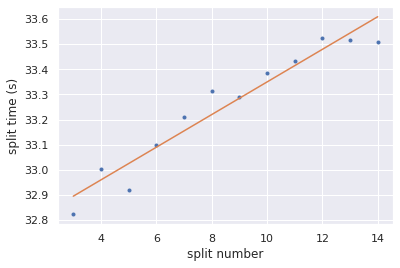


mean slowdown: 0.065 sec./split
95% conf int of mean slowdown: [0.051, 0.079] sec./split


In [5]:
import numpy as np
import dc_stat_think as dcst
import seaborn as sns

sns.set()

# Perform regression
slowdown, split_3 = np.polyfit(split_number, mean_splits, 1)

# Compute pairs bootstrap
bs_reps, _ = dcst.draw_bs_pairs_linreg(split_number, mean_splits, 10000)

# Compute confidence interval
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Plot the data with regressions line
plt.plot(split_number, mean_splits, marker='.', linestyle='none')
plt.plot(split_number, slowdown * split_number + split_3, '-')

# Label axes and show plot
plt.xlabel('split number')
plt.ylabel('split time (s)')
plt.show()

# Print the slowdown per split
print("""
mean slowdown: {0:.3f} sec./split
95% conf int of mean slowdown: [{1:.3f}, {2:.3f}] sec./split""".format(
    slowdown, *conf_int))


There is a small (about 6 hundreths of a second), but discernible, slowdown per split. 

### ***Hypothesis test: are they slowing down?***

Now we will test the null hypothesis that the swimmer's split time is not at all correlated with the distance they are at in the swim. We will use the Pearson correlation coefficient (computed using `dcst.pearson_r()`) as the test statistic.

* Compute the observed Pearson correlation, storing it as `rho`.

* Using `np.empty()`, initialize the array of 10,000 permutation replicates of the Pearson correlation, naming it `perm_reps_rho`.

* Write a `for` loop to:
  
  * Scramble the split number array using `np.random.permutation()`, naming it `scrambled_split_number`.

  * Compute the Pearson correlation coefficient between the scrambled split number array and the mean split times and store it in `perm_reps_rho`.

* Compute the p-value and display it on the screen. Take "at least as extreme as" to mean that the Pearson correlation is at least as big as was observed.

In [6]:
# Observed correlation
rho = dcst.pearson_r(split_number, mean_splits)

# Initialize permutation reps
perm_reps_rho = np.empty(10000)

# Make permutation reps
for i in range(10000):
    # Scramble the split number array
    scrambled_split_number = np.random.permutation(split_number)
    
    # Compute the Pearson correlation coefficient
    perm_reps_rho[i] = dcst.pearson_r(scrambled_split_number, mean_splits)
    
# Compute and print p-value
p_val = np.sum(perm_reps_rho >= rho) / len(perm_reps_rho)
print('p =', p_val)

p = 0.0


The tiny effect is very real! With 10,000 replicates, we never got a correlation as big as observed under the hypothesis that the swimmers do not change speed as the race progresses.

### ***A metric for improvement***

In your first analysis, you will investigate how times of swimmers in 50 m events change as they move between low numbered lanes (1-3) to high numbered lanes (6-8) in the semifinals and finals. We showed in the previous chapter that there is little difference between semifinal and final performance, so you will neglect any differences due to it being the final versus the semifinal.

You want to use as much data as you can, so use all four strokes for both the men's and women's competitions. As such, what would be a good metric for improvement from one round to the next for an individual swimmer, where $t_a$ is the swim time in a low numbered lane and $t_b$ is the swim time in a high numbered lane?

* The fractional improvement of swim time, $\dfrac{t_a - t_b}{t_a}$



### ***ECDF of improvement from low to high lanes***

Now that you have a metric for improvement going from low-tohigh-numbered lanes, plot an ECDF of this metric.  The swim times are stored in the NumPy arrays `swimtime_high_lanes` and `swimtime_low_lanes`. Entry `i` in the respective arrays are for the same swimmer in the same event.

* Compute the fractional improvement for being in a high-numbered lane for each swimmer using the formula from the last exercise. Store the result in the variable `f`.

* Compute the x and y values for plotting the ECDF.

* Plot the ECDF as dots.

* Label the x-axis `'f'`, y-axis `'ECDF'`, and show the plot.

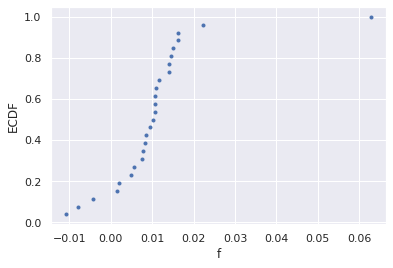

In [3]:
import numpy as np
import dc_stat_think as dcst
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

swimtime_low_lanes = np.array([24.66, 23.28, 27.2 , 24.95, 32.34, 24.66, 26.17, 27.93, 23.35,
       22.93, 21.93, 28.33, 25.14, 25.19, 26.11, 31.31, 27.44, 21.85,
       27.48, 30.66, 21.74, 23.22, 27.93, 21.42, 24.79, 26.46])

swimtime_high_lanes = np.array([24.62, 22.9 , 27.05, 24.76, 30.31, 24.54, 26.12, 27.71, 23.15,
       23.11, 21.62, 28.02, 24.73, 24.95, 25.83, 30.61, 27.04, 21.67,
       27.16, 30.23, 21.51, 22.97, 28.05, 21.65, 24.54, 26.06])

# Compute the fractional improvement of being in high lane: f
f = (swimtime_low_lanes - swimtime_high_lanes) / swimtime_low_lanes

# Make x and y values for ECDF: x, y
x, y = dcst.ecdf(f)

# Plot the ECDFs as dots
plt.plot(x, y, marker='.', linestyle='none')

# Label the axes and show the plot
plt.xlabel('f')
plt.ylabel('ECDF')
plt.show()


This is starting to paint a picture of lane bias. The ECDF demonstrates that all but three (3 จุด ก่อน f=0.00) of the 26 swimmers swam faster in the high numbered lanes.


### ***Estimation of mean improvement***

You will now estimate how big this current effect is. Compute the mean fractional improvement for being in a high-numbered lane versus a low-numbered lane, along with a 95% confidence interval of the mean.

* Compute the mean fractional difference using `np.mean()`. The variable `f` from the last exercise is already in your namespace.

* Draw 10,000 bootstrap replicates of the mean fractional difference using `dcst.draw_bs_reps()`. Store the result in a numpy array named `bs_reps`.

* Compute the 95% confidence interval using `np.percentile()`.


In [5]:
# Compute the mean difference: f_mean
f_mean = np.mean(f)

# Draw 10,000 bootstrap replicates: bs_reps
bs_reps = dcst.draw_bs_reps(f, np.mean, 10000)

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Print the result
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]""".format(f_mean, *conf_int))


mean frac. diff.: 0.01051
95% conf int of mean frac. diff.: [0.00616, 0.01602]


### ***How should we test the hypothesis?***

You are interested in the presence of lane bias toward higher lanes, presumably due to a slight current in the pool. A natural null hypothesis to test, then, is that the mean fractional improvement going from low to high lane numbers is zero. Which of the following is a good way to simulate this null hypothesis?

As a reminder, the arrays `swimtime_low_lanes` and `swimtime_high_lanes` contain the swim times for lanes 1-3 and 6-8, respectively, and we define the fractional improvement as `f = (swimtime_low_lanes - swimtime_high_lanes) / swimtime_low_lanes`

* Subtract the mean of `f` from `f` to generate `f_shift`. Then, take bootstrap replicate of the mean from this `f_shift`.

### ***Hypothesis test: Does lane assignment affect performance?
Perform a bootstrap hypothesis test of the null hypothesis that the mean fractional improvement going from low-numbered lanes to high-numbered lanes is zero. Take the fractional improvement as your test statistic, and "at least as extreme as" to mean that the test statistic under the null hypothesis is greater than or equal to what was observed.

* Create an array `f_shift`, by shifting `f` such that its mean is zero. You can use the variable `f_mean` computed in previous exercises.

* Draw 100,000 bootstrap replicates of the mean of the `f_shift`.

* Compute and print the p-value.

In [6]:
# Shift f: f_shift
f_shift = f - f.mean()

# Draw 100,000 bootstrap replicates of the mean: bs_reps
bs_reps = dcst.draw_bs_reps(f_shift, np.mean, 100000)

# Compute and report the p-value
p_val = np.sum(bs_reps >= f.mean()) / 100000
print('p =', p_val)

p = 0.00035


A p-value of 0.0003 is quite small and suggests that the mean fractional improvment is greater than zero. 

### ***Did the 2015 event have this problem?***

You would like to know if this is a typical problem with pools in competitive swimming. To address this question, perform a similar analysis for the results of the 2015 FINA World Championships. That is, compute the mean fractional improvement for going from lanes 1-3 to lanes 6-8 for the 2015 competition, along with a 95% confidence interval on the mean. Also test the hypothesis that the mean fractional improvement is zero.

The arrays `swimtime_low_lanes_15` and `swimtime_high_lanes_15` have the pertinent data.

Compute the fractional improvement, `f` using the arrays `swimtime_low_lanes_15` and `swimtime_high_lanes_15`. Also compute the mean of `f`, storing it as `f_mean`.

* Draw 10,000 bootstrap replicates of the mean `f`.

* Compute the 95% confidence interval of the mean fractional improvement.

* Shift `f` to create `f_shift` such that its mean is zero.

* Draw 100,000 bootstrap replicates of the mean of `f_shift`.

* Compute the p-value.

In [8]:
swimtime_low_lanes_15 = np.array([27.66, 24.69, 23.29, 23.05, 26.87, 31.03, 22.04, 24.51, 21.86,
       25.64, 25.91, 24.77, 30.14, 27.23, 24.31, 30.2 , 26.86])

swimtime_high_lanes_15 = np.array([27.7 , 24.64, 23.21, 23.09, 26.87, 30.74, 21.88, 24.5 , 21.86,
       25.9 , 26.2 , 24.73, 30.13, 26.92, 24.31, 30.25, 26.76])

# Compute f and its mean
f = (swimtime_low_lanes_15 - swimtime_high_lanes_15) / swimtime_low_lanes_15
f_mean = f.mean()

# Draw 10,000 bootstrap replicates
bs_reps = dcst.draw_bs_reps(f, np.mean, 10000)

# Compute 95% confidence interval
conf_int = np.percentile(bs_reps, [2.5, 97.5])

# Shift f
f_shift = f - f.mean()

# Draw 100,000 bootstrap replicates of the mean
bs_reps = dcst.draw_bs_reps(f_shift, np.mean, 100000)

# Compute the p-value
p_val = np.sum(bs_reps >= f_mean) / 100000

# Print the results
print("""
mean frac. diff.: {0:.5f}
95% conf int of mean frac. diff.: [{1:.5f}, {2:.5f}]
p-value: {3:.5f}""".format(f_mean, *conf_int, p_val))


mean frac. diff.: 0.00079
95% conf int of mean frac. diff.: [-0.00185, 0.00343]
p-value: 0.28239


Both the confidence interval an the p-value suggest that there was no lane bias in 2015.

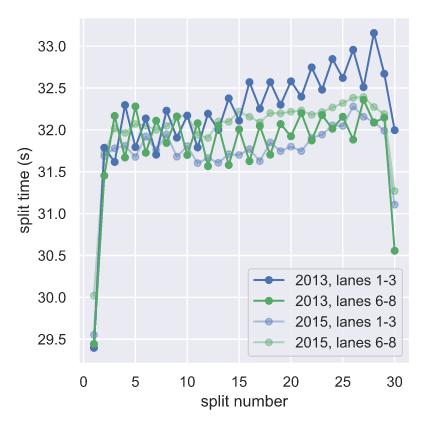

You should include all splits except the first two and the last two. You should neglect the last two because swimmers stop pacing themselves and "kick" for the final stretch. The first two are different because they involve jumping off the starting blocks and more underwater swimming than others.

### ***EDA: mean differences between odd and even splits***

To investigate the differences between odd and even splits, you first need to define a difference metric. In previous exercises, you investigated the improvement of moving from a low-numbered lane to a high-numbered lane, defining `f = (ta - tb) / ta`. There, the `ta` in the denominator served as our reference time for improvement. Here, you are considering both improvement and decline in performance depending on the direction of swimming, so you want the reference to be an average. So, we will define the **fractional difference** as `f = 2(ta - tb) / (ta + tb)`.

Your task here is to plot the mean fractional difference between odd and even splits versus lane number. I have already calculated the mean fractional differences for the 2013 and 2015 Worlds for you, and they are stored in `f_13` and `f_15`. The corresponding lane numbers are in the array lanes.

* Plot `f_13` versus `lanes` using keyword arguments `marker='.'`, `markersize=12`, and `linestyle='none'`.

* Do the same for `f_15` versus `lanes`.


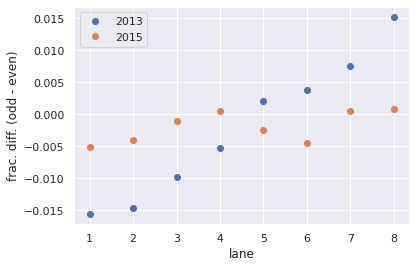

In [3]:
import numpy as np
import dc_stat_think as dcst
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

f_13 = np.array([-0.01562214, -0.0146381 , -0.00977673, -0.00525713,  0.00204104, 0.00381014,  0.0075664 ,  0.01525869])
f_15 = np.array([-0.00516018, -0.00392952, -0.00099284,  0.00059953, -0.002424, -0.00451099,  0.00047467,  0.00081962])
lanes = np.array([1, 2, 3, 4, 5, 6, 7, 8])

# Plot the the fractional difference for 2013 and 2015
plt.plot(lanes, f_13, marker='.', markersize=12, linestyle='none')
plt.plot(lanes, f_15, marker='.', markersize=12, linestyle='none')

# Add a legend
plt.legend((2013, 2015))

# Label axes and show plot
plt.xlabel('lane')
plt.ylabel('frac. diff. (odd - even)')
plt.show()

EDA has exposed a strong slope in 2013 compared to 2015.

### ***How does the current effect depend on lane position?***

To quantify the effect of lane number on performance, perform a linear regression on the `f_13` versus `lanes` data. Do a pairs bootstrap calculation to get a 95% confidence interval. Finally, make a plot of the regression. The arrays `lanes` and `f_13` are in your namespace.

Note that we could compute error bars on the mean fractional differences and use them in the regression, but that is beyond the scope of this course.

* Compute the slope and intercept of the `f_13` versus `lanes` line using `np.polyfit()`.

* Use `dcst.draw_bs_pairs_linreg()` to get 10,000 bootstrap replicates of the slope and intercept, storing them respectively in `bs_reps_slope` and `bs_reps_int`.

* Use the bootstrap replicates to compute a 95% confidence interval for the slope.

* Print the slope and 95% confidence interval to the screen. This has been done for you.

* Using `np.array()`, generate x-values to use for the plot of the bootstrap lines. `x` should go from `1` to `8`.

* The plot is already populated with the data. Write a `for` loop to add `100` bootstrap lines to the plot using the keyword arguments `color='red'`, `alpha=0.2`, and `linewidth=0.5`.


slope: 0.00447 per lane
95% conf int: [0.00393, 0.00501] per lane


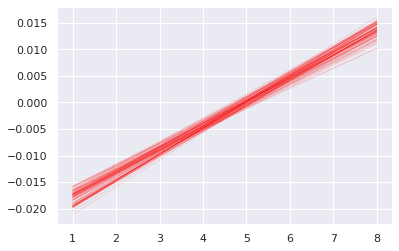

In [4]:
# Compute the slope and intercept of the frac diff/lane curve
slope, intercept = np.polyfit(lanes, f_13, 1)

# Compute bootstrap replicates
bs_reps_slope, bs_reps_int = dcst.draw_bs_pairs_linreg(lanes, f_13, 10000)

# Compute 95% confidence interval of slope
conf_int = np.percentile(bs_reps_slope, [2.5, 97.5])

# Print slope and confidence interval
print("""
slope: {0:.5f} per lane
95% conf int: [{1:.5f}, {2:.5f}] per lane""".format(slope, *conf_int))

# x-values for plotting regression lines
x = np.array([1, 8])

# Plot 100 bootstrap replicate lines
for i in range(100):
    plt.plot(x, bs_reps_slope[i] * x + bs_reps_int[i], color='red', alpha=0.2, linewidth=0.5)
   
# Update the plot
plt.draw()
plt.show()

The slope is a fractional difference of about 0.4% per lane. This is quite a substantial difference at this elite level of swimming where races can be decided by tiny differences.

### ***Hypothesis test: can this be by chance?***

The EDA and linear regression analysis is pretty conclusive. Nonetheless, you will top off the analysis of the zigzag effect by testing the hypothesis that lane assignment has nothing to do with the mean fractional difference between even and odd lanes using a permutation test. You will use the Pearson correlation coefficient, which you can compute with `dcst.pearson_r()` as the test statistic. The variables `lanes` and `f_13` are already in your namespace.

* Compute the observed Pearson correlation coefficient, storing it as `rho`.

* Initialize an array to store the 10,000 permutation replicates of `rho` using `np.empty()`. Name the array `perm_reps_rho`.

* Write a **`for`** loop to draw the permutation replicates.

  * Scramble the lanes array using `np.random.permutation()`.
  * Compute the Pearson correlation coefficient between the scrambled `lanes` array and `f_13`. Store the result in `perm_reps_rho`.

* Compute and print the p-value. Take "at least as extreme as" to be that the Pearson correlation coefficient is greater than or equal to what was observed.

In [5]:
# Compute observed correlation: rho
rho = dcst.pearson_r(lanes, f_13)

# Initialize permutation reps: perm_reps_rho
perm_reps_rho = np.empty(10000)

# Make permutation reps
for i in range(10000):
    # Scramble the lanes array: scrambled_lanes
    scrambled_lanes = np.random.permutation(lanes)
    
    # Compute the Pearson correlation coefficient
    perm_reps_rho[i] = dcst.pearson_r(scrambled_lanes, f_13)
    
# Compute and print p-value
p_val = np.sum(perm_reps_rho >= rho) / 10000
print('p =', p_val)

p = 0.0


### ***Parkfield earthquake magnitudes***

As usual, you will start with EDA and plot the ECDF of the magnitudes of earthquakes detected in the Parkfield region from 1950 to 2016. The magnitudes of all earthquakes in the region from the ANSS ComCat are stored in the NumPy array `mags`.

When you do it this time, though, take a shortcut in generating the ECDF. You may recall that 

* Putting an asterisk before an argument in a function splits what follows into separate arguments. 

Since `dcst.ecdf()` returns two values, we can pass them as the `x`, `y` positional arguments to `plt.plot()` as **`plt.plot(*dcst.ecdf(data_you_want_to_plot))`**.

You will use this shortcut in this exercise and going forward.

* Generate a plot of the ECDF in one line, using the `*dcst.ecdf()` approach describe above. Call `plt.plot()` with the `marker='.'` and `linestyle='none'` keyword arguments as usual.


In [ ]:
plt.plot(*dcst.ecdf(mags), marker='.', linestyle='none')
plt.xlabel('magnitude')
plt.ylabel('ECDF')
plt.show()

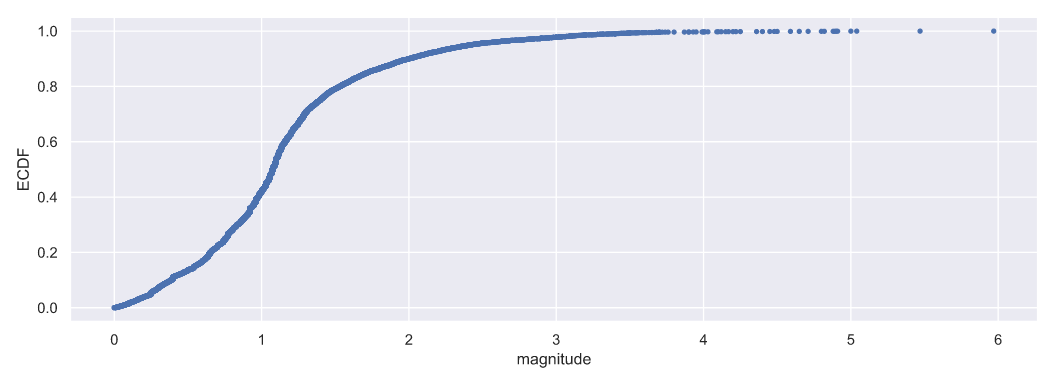

Note the distinctive roll-off at magnitudes below 1.0.

### ***Computing the b-value***

The b-value is a common metric for the seismicity of a region. You can imagine you would like to calculate it often when working with earthquake data. For tasks like this that you will do often, it is best to write a function! So, write a function with signature `b_value(mags, mt, perc=[2.5, 97.5], n_reps=None)` that returns the b-value and (optionally, if `n_reps` is not None) its confidence interval for a set of magnitudes, mags. The completeness threshold is given by `mt`. The `perc` keyword argument gives the percentiles for the lower and upper bounds of the confidence interval, and `n_reps` is the number of bootstrap replicates to use in computing the confidence interval.

* Define a function with signature `b_value(mags, mt, perc=[2.5, 97.5], n_reps=None)` that does the following:

  * Slice magnitudes out of `mags` at and above the completeness threshold `mt` using Boolean indexing. Store the result in the variable `m`.

  * Compute the best estimate of the b-value. Remember, the best estimate for the b-value is `b = (m - mt)·ln(10)`. Store the result in the variable `b`.
  
  * If `n_reps` is not None, do the following.

    * Draw `n_reps` bootstrap replicates of the mean of `m`. Store the result in the variable `m_bs_reps`.

    * Convert the bootstrap replicates of the mean of `m` to replicates of the b-value. Store the result in `b_bs_reps`.

    * Compute the confidence interval from the bootstrap replicates of the b-value. Store the result in `conf_int`.

* Return `b` and `conf_int`, or just `b` if `n_reps` is `None`.

In [2]:
def b_value(mags, mt, perc=[2.5, 97.5], n_reps=None):
    """Compute the b-value and optionally its confidence interval."""
    # Extract magnitudes above completeness threshold: m
    m = mags[mags >= mt]

    # Compute b-value: b
    b = (np.mean(m) - mt) * np.log(10)

    # Draw bootstrap replicates
    if n_reps is None:
        return b
    else:
        m_bs_reps = dcst.draw_bs_reps(m, np.mean, n_reps)

        # Compute b-value from replicates: b_bs_reps
        b_bs_reps = (m_bs_reps - mt) * np.log(10)

        # Compute confidence interval: conf_int
        conf_int = np.percentile(b_bs_reps, perc)
    
        return b, conf_int

### ***The b-value for Parkfield***

The ECDF is effective at exposing roll-off, as you could see below magnitude 1. Because there are plenty of earthquakes above magnitude 3, you can use `mt=3` as your completeness threshold. With this completeness threshold, compute the b-value for the Parkfield region from 1950 to 2016, along with the 95% confidence interval. Print the results to the screen. The variable `mags` with all the magnitudes is in your namespace.

Overlay the theoretical Exponential CDF to verify that the Parkfield region follows the Gutenberg-Richter Law.

* Compute the b-value and the 95% confidence interval using your `b_value()` function. Use 10,000 bootstrap replicates.

* Use `np.random.exponential()` to draw 100,000 samples from the theoretical distribution. The mean for the distribution is `b/np.log(10)`, and you need to add `mt` to your samples to appropriately handle the location parameter. Store the result in `m_theor`.

* Plot the ECDF of `m_theor` as a line.

* Plot the ECDF of all magnitudes above `mt` as dots.


In [ ]:
# Compute b-value and 95% confidence interval
b, conf_int = b_value(mags, mt, perc=[2.5, 97.5], n_reps=10000)

# Generate samples to for theoretical ECDF
m_theor = np.random.exponential(b/np.log(10), size=100000) + mt

# Plot the theoretical CDF
plt.plot(*dcst.ecdf(m_theor))

# Plot the ECDF (slicing mags >= mt)
plt.plot(*dcst.ecdf(mags[mags >= mt]), marker='.', linestyle='none')

# Pretty up and show the plot
plt.xlabel('magnitude')
plt.ylabel('ECDF')
plt.xlim(2.8, 6.2)
plt.show()

# Report the results
print("""
b-value: {0:.2f}
95% conf int: [{1:.2f}, {2:.2f}]""".format(b, *conf_int))

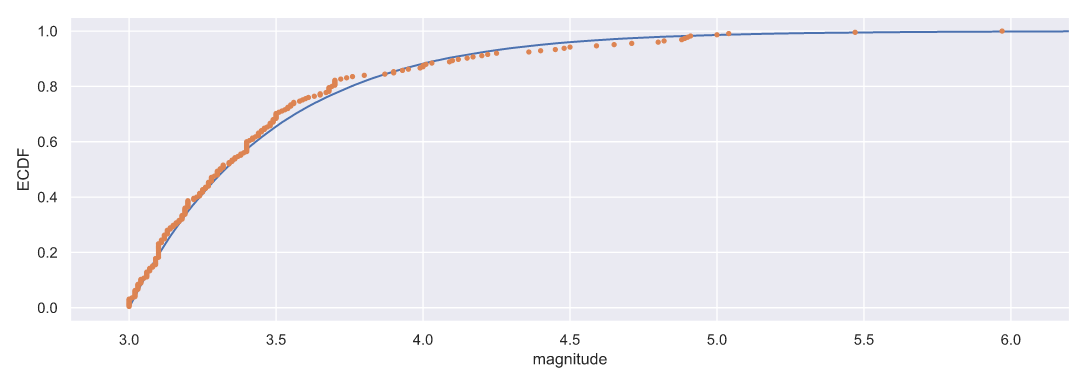

Parkfield seems to follow the Gutenberg-Richter law very well. The b-value of 
about 1 is typical for regions along fault zones.

### ***Interearthquake time estimates for Parkfield***

In this exercise, you will first compute the best estimates for the parameters for the Exponential and Gaussian models for interearthquake times. You will then plot the theoretical CDFs for the respective models along with the formal ECDF of the actual Parkfield interearthquake times.

* Compute the mean interearthquake time and store it as `mean_time_gap`. The time gaps between the major earthquakes, in units of years, are stored in `time_gap`.

* Compute the standard deviation of the interearthquake times and store it as `std_time_gap`.

* Use `np.random.exponential()` to draw 10,000 samples out of an Exponential distribution with the appropriate mean. Store them in the variable `time_gap_exp`.

* Use `np.random.normal()` to draw 10,000 samples out of a Normal distribution with the appropriate mean and standard deviation. Store them in the variable `time_gap_norm`.

* Plot the theoretical CDFs in one line each, using the `*dcst.ecdf()` approach introduced earlier in this chapter.

* Plot the ECDF using the `formal=True`, `min_x=-10`, and `max_x=50` keyword arguments.

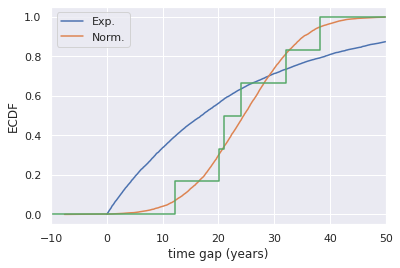

In [3]:
import numpy as np
import dc_stat_think as dcst
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

time_gap = np.array([24.06570842, 20.07665982, 21.01848049, 12.24640657, 32.05475702, 38.2532512 ])

# Compute the mean time gap: mean_time_gap
mean_time_gap = np.mean(time_gap)

# Standard deviation of the time gap: std_time_gap
std_time_gap = np.std(time_gap)

# Generate theoretical Exponential distribution of timings: time_gap_exp
time_gap_exp = np.random.exponential(mean_time_gap, size=10000)

# Generate theoretical Normal distribution of timings: time_gap_norm
time_gap_norm = np.random.normal(loc=mean_time_gap, scale=std_time_gap, size=10000)

# Plot theoretical CDFs
plt.plot(*dcst.ecdf(time_gap_exp))
plt.plot(*dcst.ecdf(time_gap_norm))

# Plot Parkfield ECDF
plt.plot(*dcst.ecdf(time_gap, formal=True, min_x=-10, max_x=50))

# Add legend
plt.legend(('Exp.', 'Norm.'), loc='upper left')

# Label axes, set limits and show plot
plt.xlabel('time gap (years)')
plt.ylabel('ECDF')
plt.xlim(-10, 50)
plt.show()

Gaussian model seems to describe the observed data best.

### ***When will the next big Parkfield quake be?***

The last big earthquake in the Parkfield region was on the evening of September 27, 2004 local time. Your task is to get an estimate as to when the next Parkfield quake will be, assuming the Exponential model and also the Gaussian model. In both cases, the best estimate is given by the mean time gap, which you computed in the last exercise to be 24.62 years, meaning that the next earthquake would be in 2029. Compute 95% confidence intervals on when the next earthquake will be assuming an Exponential distribution parametrized by `mean_time_gap` you computed in the last exercise. Do the same assuming a Normal distribution parametrized by `mean_time_gap` and `std_time_gap`.

* Draw 100,000 sample from an Exponential distribution with a mean given by `mean_time_gap`. Store the result in `exp_samples`.

* Draw 100,000 sample from a Normal distribution with a mean given by `mean_time_gap` and standard deviation given by `std_time_gap`. Store the result in `norm_samples`.

* Because there has not been a Parkfield earthquake as of today, slice out samples that are greater than `today - last_quake`, where I have stored the decimal year of today as `today`, and `last_quake = 2004.74`, the decimal year of the last Parkfield earthquake. Overwrite the respective `exp_samples` and `norm_samples` variables with these sliced arrays.

* Use `np.percentile()` to compute the 95% confidence interval for when the next Parkfield earthquake will be. In the same function call, you can also compute the median by including the 50th percentile.

In [5]:
last_quake = 2004.74
today = 2022.3230553265657

# Draw samples from the Exponential distribution: exp_samples
exp_samples = np.random.exponential(mean_time_gap, size=100000)

# Draw samples from the Normal distribution: norm_samples
norm_samples = np.random.normal(loc=mean_time_gap, scale=std_time_gap, size=100000)

# No earthquake as of today, so only keep samples that are long enough
exp_samples = exp_samples[exp_samples > today - last_quake]
norm_samples = norm_samples[norm_samples > today - last_quake]

# Compute the confidence intervals with medians
conf_int_exp = np.percentile(exp_samples, [2.5, 50, 97.5]) + last_quake
conf_int_norm = np.percentile(norm_samples, [2.5, 50, 97.5]) + last_quake

# Print the results
print('Exponential:', conf_int_exp)
print('     Normal:', conf_int_norm)

Exponential: [2022.94016599 2039.32757355 2112.9777313 ]
     Normal: [2022.91094147 2031.51274552 2046.66372851]


 The models given decidedly different predictions. The Gaussian model says the next earthquake is almost sure to be in the next few decades, but the Exponential model says we may very well have to wait longer.

### ***Computing the K-S statistic***

Write a function to compute the Kolmogorov-Smirnov statistic from two datasets, `data1` and `data2`, in which `data2` consists of samples from the theoretical distribution you are comparing your data to. Note that this means we are using hacker stats to compute the K-S statistic for a dataset and a theoretical distribution, not the K-S statistic for two empirical datasets. Conveniently, the function you just selected for computing values of the formal ECDF is given as `dcst.ecdf_formal()`.

* Compute the values of the convex corners of the formal ECDF for `data1` using `dcst.ecdf()`. Store the results in the variables `x` and `y`.

* Use `dcst.ecdf_formal()` to compute the values of the theoretical CDF, determined from `data2`, at the convex corners `x`. Store the result in the variable `cdf`.

* Compute the distances between the concave corners of the formal ECDF and the theoretical CDF. Store the result as `D_top`.

* Compute the distance between the convex corners of the formal ECDF and the theoretical CDF. Note that you will need to subtract `1/len(data1)` from `y` to get the y-value at the convex corner. Store the result in `D_bottom`.

* Return the K-S statistic as the maximum of all entries in `D_top` and `D_bottom`. You can pass `D_top` and `D_bottom` together as a tuple to `np.max()` to do this.

In [6]:
def ks_stat(data1, data2):
    # Compute ECDF from data: x, y
    x, y =dcst.ecdf(data1)
    
    # Compute corresponding values of the target CDF
    cdf = dcst.ecdf_formal(x, data2)

    # Compute distances between concave corners and CDF
    D_top = y - cdf

    # Compute distance between convex corners and CDF
    D_bottom = cdf - y + 1/len(data1)

    return np.max((D_top, D_bottom))

### ***Drawing K-S replicates***

Now, you need a function to draw Kolmogorov-Smirnov replicates out of a target distribution, `f`. Construct a function with signature `draw_ks_reps(n, f, args=(), size=10000, n_reps=10000)` to do so. Here, `n` is the number of data points, and `f` is the function you will use to generate samples from the target CDF. For example, to test against an Exponential distribution, you would pass `np.random.exponential` as `f`. This function usually takes arguments, which must be passed as a tuple. So, if you wanted to take samples from an Exponential distribution with mean `x_mean`, you would use the `args=(x_mean,)` keyword. The keyword arguments `size` and `n_reps` respectively represent the number of samples to take from the **target distribution** and the number of **replicates** to draw.

* Write a function with signature `draw_ks_reps(n, f, args=(), size=10000, n_reps=10000)` that does the following.

  * Generate `size` samples from the target distribution `f`. Remember, to pass the `args` into the sampling function, you should use the `f(*args, size=size)` construction. Store the result as `x_f`.

  * Initialize the replicates array, `reps`, as an empty array with `n_reps` entries.

  * Write a **`for`** loop to do the following `n_reps` times.

    * Draw `n` samples from `f`. Again, use `*args` in your function call. Store the result in the variable `x_samp`.

    * Compute the K-S statistic using `dcst.ks_stat()`, which is the function you wrote in the previous exercise.  Store the result in the `reps` array.

  * Return the array `reps`.


In [7]:
def draw_ks_reps(n, f, args=(), size=10000, n_reps=10000):
    # Generate samples from target distribution
    x_f = f(*args, size=size)
    
    # Initialize K-S replicates
    reps = np.empty(n_reps)
    
    # Draw replicates
    for i in range(n_reps):
        # Draw samples for comparison
        x_samp = f(*args, size=n)
        
        # Compute K-S statistic
        reps[i] = dcst.ks_stat(x_samp, x_f)

    return reps

The above function will allow you to draw K-S replicates for use in K-S tests for arbitrary continuous distributions. 

### ***The K-S test for Exponentiality***

Test the null hypothesis that the interearthquake times of the Parkfield sequence are Exponentially distributed. That is, earthquakes happen at random with no memory of when the last one was. Note: This calculation is computationally intensive (you will draw more than 108 random numbers), so it will take about 10 seconds to complete.

* Draw 10,000 replicates from the Exponential distribution using `np.random.exponential()`. The mean time gap between earthquakes is stored as `mean_time_gap`, which you computed in a previous exercise. Store the result in `x_f`.

* Use these samples, `x_f`, along with the actual time gaps, stored in `time_gap`, to compute the Kolmogorov-Smirnov statistic using `dcst.ks_stat()`.

* Use the function you wrote in the last exercise, now conveniently stored as `dcst.draw_ks_reps()` to draw 10,000 K-S replicates from the Exponential distribution. Use the `size=10000` keyword argument for drawing out of the target Exponential distribution. Store the replicates as `reps`.

* Compute and print the p-value. Remember that "at least as extreme as" is defined in this case as the test statistic under the null hypothesis being greater than or equal to what was observed.

In [11]:
# Draw target distribution: x_f
x_f = np.random.exponential(mean_time_gap, size=10000)

# Compute K-S stat: d
d = dcst.ks_stat(time_gap, x_f)

# Draw K-S replicates: reps
reps = dcst.draw_ks_reps(len(time_gap), np.random.exponential, args=(mean_time_gap,), size=10000, n_reps=10000)

# Compute and print p-value
p_val = np.sum(reps >= d) / 10000
print('p =', p_val)

# Draw target distribution: x_f
x_f = np.random.normal(loc=mean_time_gap, scale=std_time_gap, size=10000)

# Compute K-S stat: d
d = dcst.ks_stat(time_gap, x_f)

# Draw K-S replicates: reps
reps = dcst.draw_ks_reps(len(time_gap), np.random.normal, args=(mean_time_gap, std_time_gap,), size=10000, n_reps=10000)

# Compute and print p-value
p_val = np.sum(reps >= d) / 10000
print('p =', p_val)

p = 0.2406
p = 0.9674


That's a p-value above 0.2. This means that the Parkfield sequence is not outside the realm of possibility if earthquakes are a Poisson process. This ***does NOT mean*** that they are generated by a Poisson process, but that the observed sequence is not incongruous with that model. The upshot is that it is really hard to say when the next Parkfield quake will be.

* p_value ของ normal เยอะกว่า น่าจะแปลได้ว่า ใกล้เคียงกับ normal มากกว่า

### ***EDA: Plotting earthquakes over time***

Make a plot where the y-axis is the magnitude and the x-axis is the time of all earthquakes in Oklahoma between 1980 and the first half of 2017. Each dot in the plot represents a single earthquake. The time of the earthquakes, as decimal years, is stored in the NumPy array `time`, and the magnitudes in the NumPy array `mags`.
  
* Plot the magnitude (`mags`) versus time (`time`) using `plt.plot()` with keyword arguments `marker='.'` and `linestyle='none'`. Also use the keyword argument `alpha=0.1` to make the points transparent to better visualize overlapping points.

In [10]:
# Plot time vs. magnitude
plt.plot(time, mags, marker='.', linestyle='none', alpha=0.1)

# Label axes and show the plot
plt.xlabel('time (year)')
plt.ylabel('magnitude')
plt.show()

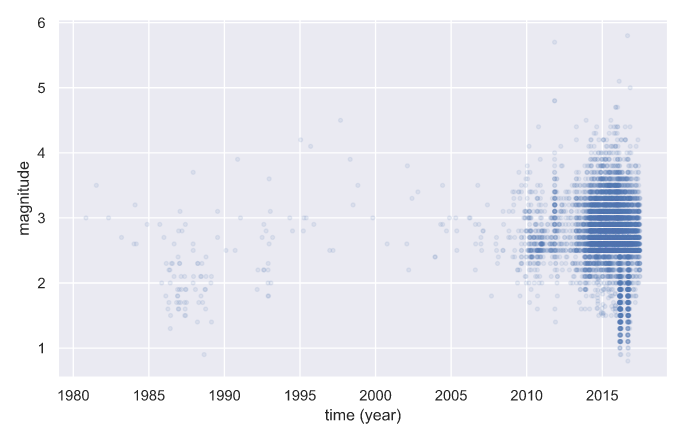

### ***Estimates of the mean interearthquake times***

The graphical EDA in the last exercise shows an obvious change in earthquake frequency around 2010. To compare, compute the mean time between earthquakes of magnitude 3 and larger from 1980 through 2009 and also from 2010 through mid-2017. Also include 95% confidence intervals of the mean. The variables `dt_pre` and `dt_post` respectively contain the time gap between all earthquakes of magnitude at least 3 from pre-2010 and post-2010 in units of days.

* Compute the mean interearthquake time for pre- (`dt_pre`) and post-2010 (`dt_post`).

* Draw 10,000 bootstrap replicates of the mean for the pre- and post-2010 datasets.

* Use `np.percentile()` to compute the 95% confidence interval of the mean for both datasets.



In [ ]:
# Compute mean interearthquake time
mean_dt_pre = dt_pre.mean()
mean_dt_post = dt_post.mean()

# Draw 10,000 bootstrap replicates of the mean
bs_reps_pre = dcst.draw_bs_reps(dt_pre, np.mean, 10000)
bs_reps_post = dcst.draw_bs_reps(dt_post, np.mean, 10000)

# Compute the confidence interval
conf_int_pre = np.percentile(bs_reps_pre, [2.5, 97.5])
conf_int_post = np.percentile(bs_reps_post, [2.5, 97.5])

# Print the results
print("""1980 through 2009
mean time gap: {0:.2f} days
95% conf int: [{1:.2f}, {2:.2f}] days""".format(mean_dt_pre, *conf_int_pre))

print("""
2010 through mid-2017
mean time gap: {0:.2f} days
95% conf int: [{1:.2f}, {2:.2f}] days""".format(mean_dt_post, *conf_int_post))



```
    1980 through 2009
    mean time gap: 204.61 days
    95% conf int: [138.45, 276.83] days
    
    2010 through mid-2017
    mean time gap: 1.12 days
    95% conf int: [0.97, 1.30] days
```
There is almost a 200-fold increase in earthquake frequency after 2010.

### ***Hypothesis test: did earthquake frequency change?***

Obviously, there was a massive increase in earthquake frequency once wastewater injection began. Nonetheless, you will still do a hypothesis test for practice. You will not test the hypothesis that the interearthquake times have the same distribution before and after 2010, since wastewater injection may affect the distribution. Instead, you will assume that they have the same mean. So, compute the p-value associated with the hypothesis that the pre- and post-2010 interearthquake times have the same mean, using the mean of pre-2010 time gaps minus the mean of post-2010 time gaps as your test statistic.

* Compute the observed test statistic. The variables `mean_dt_pre` and `mean_dt_post` from previous exercises are in your namespace.

* Shift the post-2010 data to have the same mean as the pre-2010 data. Store the result as `dt_post_shift`.

* Draw 10,000 bootstrap replicates each of mean of `dt_pre` and `dt_post_shift`. Store the respective results in `bs_reps_pre` and `bs_reps_post`.

* Compute replicates of difference of means by subtracting `bs_reps_post` from `bs_reps_pre`.

* Compute and print the p-value. Consider "at least as extreme as" to be that the test statistic is greater than or equal to what was observed.


In [ ]:
# Compute the observed test statistic
mean_dt_diff =mean_dt_pre - mean_dt_post

# Shift the post-2010 data to have the same mean as the pre-2010 data
dt_post_shift = dt_post - mean_dt_post + mean_dt_pre

# Compute 10,000 bootstrap replicates from arrays
bs_reps_pre = dcst.draw_bs_reps(dt_pre, np.mean, 10000)
bs_reps_post = dcst.draw_bs_reps(dt_post_shift, np.mean, 10000)

# Get replicates of difference of means
bs_reps = bs_reps_pre - bs_reps_post

# Compute and print the p-value
p_val = np.sum(bs_reps >= mean_dt_diff) / 10000
print('p =', p_val)



```
p = 0.0
```
### ***EDA: Comparing magnitudes before and after 2010***

Make an ECDF of earthquake magnitudes from 1980 through 2009. On the same plot, show an ECDF of magnitudes of earthquakes from 2010 through mid-2017. The time of the earthquakes, as decimal years, are stored in the NumPy array `time` and the magnitudes in the NumPy array `mags`.

* Use Boolean indexing to slice out the magnitudes of all earthquakes before 2010 and store the result in `mags_pre`. Similarly, generate a numpy array `mags_post` that has all magnitudes of earthquakes in and after 2010.

* Use `plt.plot()` with a `*dcst.ecdf(____)` argument to make ECDFs for pre- and post- 2010 earthquake magnitudes. Remember to specify arguments for the `marker` and `linestyle` parameters.


In [ ]:
# Get magnitudes before and after 2010
mags_pre = mags[time < 2010]
mags_post = mags[time >= 2010]

# Generate ECDFs
plt.plot(*dcst.ecdf(mags_pre), marker='.', linestyle='none')
plt.plot(*dcst.ecdf(mags_post), marker='.', linestyle='none')


# Label axes and show plot
plt.xlabel('magnitude')
plt.ylabel('ECDF')
plt.legend(('1980 though 2009', '2010 through mid-2017'), loc='upper left')
plt.show()

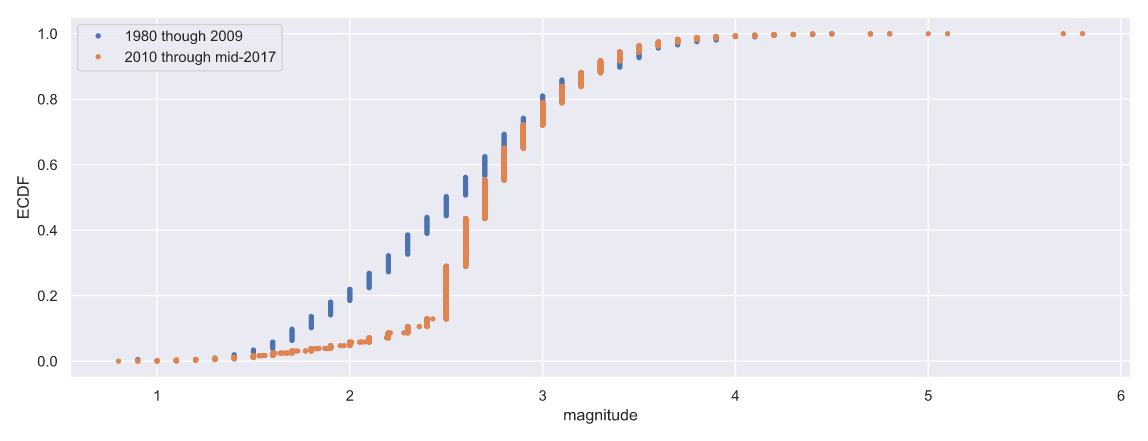

Both curves seem to follow the Gutenberg-Richter Law, but with different completeness thresholds, probably due to improvements in sensing capabilities in more recent years.

### ***Quantification of the b-values***

Based on the plot you generated in the previous exercise, you can safely use a completeness threshold of `mt=3`. Using this threshold, compute b-values for the period between 1980 and 2009 and for 2010 through mid-2017. The function `b_value()` you wrote last chapter, which computes the b-value and confidence interval from a set of magnitudes and completeness threshold, is available in your namespace, as are the numpy arrays `mags_pre` and `mags_post` from the last exercise, and `mt`.

* Compute the b-value and 95% confidence interval for earthquakes from 1980 through 2009 using 10,000 bootstrap replicates.

* Compute the b-value and 95% confidence interval for earthquakes from 2010 through mid-2017 using 10,000 bootstrap replicates.


In [ ]:
# Compute b-value and confidence interval for pre-2010
b_pre, conf_int_pre = b_value(mags_pre, mt, perc=[2.5, 97.5], n_reps=10000)

# Compute b-value and confidence interval for post-2010
b_post, conf_int_post = b_value(mags_post, mt, perc=[2.5, 97.5], n_reps=10000)


# Report the results
print("""
1980 through 2009
b-value: {0:.2f}
95% conf int: [{1:.2f}, {2:.2f}]

2010 through mid-2017
b-value: {3:.2f}
95% conf int: [{4:.2f}, {5:.2f}]
""".format(b_pre, *conf_int_pre, b_post, *conf_int_post))

The confidence interval for the b-value for recent earthquakes is tighter than for earlier ones because there are many more recent ones. Still, the confidence intervals overlap, and we can perform a hypothesis test to see if we might get these results if the b-values are actually the same.

### ***How should we do a hypothesis test on differences of the b-value?***

We wish to test the hypothesis that the b-value in Oklahoma from 1980 through 2009 is the same as that from 2010 through mid-2017. 

* You should only include earthquakes that have magnitudes above the completeness threshold. A value of 3 is reasonable.

  * Below the completeness threshold, we are not comparing earthquakes before and after 2010, but observed earthquakes before and after 2010. We do not have a complete dataset below the completeness threshold.

* You should perform a permutation test because asserting a null hypothesis that the b-values are the same implicitly assumes that the magnitudes are identically distributed, specifically Exponentially, by the Gutenberg-Richter Law.
  * We really are assuming the Gutenberg-Richter law holds, in part because we are only considering earthquakes above the completeness threshold. We are using a model (the G-R law) to deal with missing data. So, since both sets of quakes follow the same statistical model, and that model has a single parameter, a permutation test is appropriate.

* A reasonable test statistic is the difference between the mean post-2010 magnitude and the mean pre-2010 magnitude.

   * You may be thinking that the mean values are not the b-values, and that you should be using the difference in b-value as your test statistic. However, the difference in mean magnitude is directly proportional to the difference in b-value, so the result of the hypothesis test will be identical if we use b-values of mean magnitudes.

* You do not need to worry about the fact that there were far fewer earthquakes before 2010 than there were after. That is to say, there are fewer earthquakes before 2010, but sufficiently many to do a permutation test.

  * Even though they have different numbers of earthquakes, you are only interested in summary statistics about their magnitude. 

* You do not need to worry about the fact that the two time intervals are of different length.

  * Provided the time interval is long enough, the b-value is independent of the time interval, just like the mean of Exponentially distributed values is independent of how many there are, provided there are not too few.



### ***Hypothesis test: are the b-values different?***

Perform the hypothesis test sketched out on the previous exercise. The variables `mags_pre` and `mags_post` are already loaded into your namespace, as is `mt = 3`.

* Slice out the magnitudes of earthquakes before 2010 that have a magnitude above (or equal) the completeness threshold and overwrite `mags_pre` with the result. Do the same for `mags_post`.

* Compute the observed difference in mean magnitudes, subtracting the magnitudes of pre-2010 earthquakes from those of post-2010 earthquakes.

* Generate 10,000 permutation replicates using `dcst.draw_perm_reps()`. Use `dcst.diff_of_means` as the argument for `func`.

* Compute and print the p-value taking "at least as extreme as" to mean that the test statistic is ***smaller*** than what was observed.

In [ ]:
# Only magnitudes above completeness threshold
mags_pre = mags_pre[mags_pre >= mt]
mags_post = mags_post[mags_post >= mt]

# Observed difference in mean magnitudes: diff_obs
diff_obs = mags_post.mean() - mags_pre.mean()

# Generate permutation replicates: perm_reps
perm_reps = dcst.draw_perm_reps(mags_post, mags_pre, dcst.diff_of_means, 10000)

# Compute and print p-value

# ตรงนี้ ที่ใช้เครื่องหมายเป็นลบ เพราะ diff_obs < 0 ถ้าหากเราเปลี่ยนเป็น
# mags_pre.mean() - mags_post.mean() > 0 จะเปลี่ยนเครื่องหมายบรรทัดล่างเป็น >

p_val = np.sum(perm_reps < diff_obs) / 10000
print('p =', p_val)

A p-value around 0.1 suggests that the observed magnitudes are commensurate with there being no change in b-value after wastewater injection began.

### ***What can you conclude from this analysis?***

* The seismicity, as measured by the b-value, is comparable before and after wastewater injection.

* Earthquakes are over 100 times more frequent in Oklahoma after widespread wastewater injection began.

* Oklahoma has a b-value smaller than the Parkfield region, so a randomly selected earthquake above magnitude 3 in Oklahoma  more likely than not has a smaller magnitude than one above magnitude 3 randomly selected from the Parkfield region.  <<< เขียนห่าอะไรวะ ?